In [57]:
#環境設定
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation  import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [58]:
#載入資料
train=pd.read_csv('train.csv',encoding='big5')
test=pd.read_csv('test.csv',encoding='big5')
submit=pd.read_csv('gender_submission.csv',encoding='big5')

In [59]:
#看資料欄位以及有沒有遺漏值
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [62]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [64]:
#合併資料
data=train.append(test)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


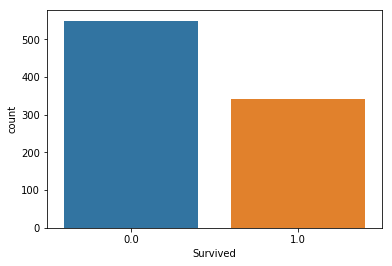

In [65]:
sns.countplot(data['Survived'])

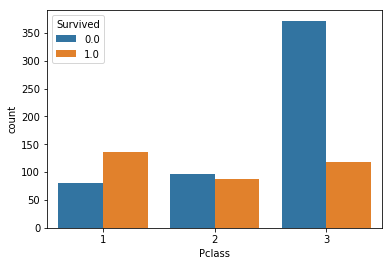

In [66]:
sns.countplot(data['Pclass'],hue=data['Survived'])

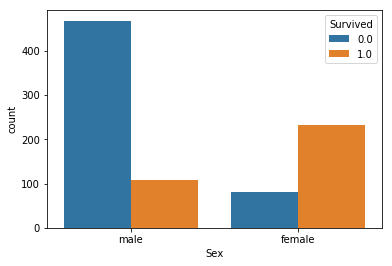

In [67]:
sns.countplot(data['Sex'],hue=data['Survived'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


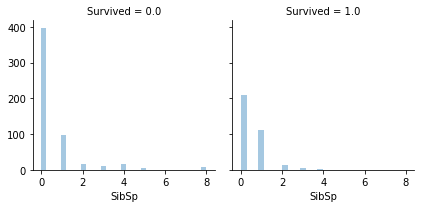

In [68]:
#兄弟姊妹＋丈夫妻子數量
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'SibSp',kde=False)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


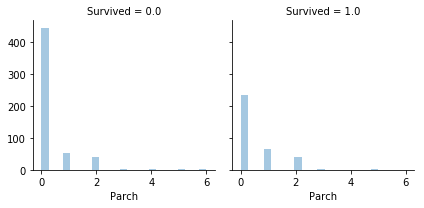

In [69]:
#父母＋小孩
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Parch',kde=False)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


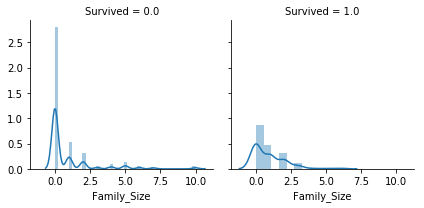

In [70]:
#組合成一個新欄位
data['Family_Size']=data['Parch']+data['SibSp']
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Family_Size',kde=True)

In [71]:
#觀察姓名欄位
data['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [72]:
data['Title1']=data['Name'].str.split('.',expand=True)[0]
#expand=True是讓資料在dataframe展開欄位
#1是選第二項的titile
data['Title1'].head(10)

0         Braund, Mr
1       Cumings, Mrs
2    Heikkinen, Miss
3      Futrelle, Mrs
4          Allen, Mr
5          Moran, Mr
6       McCarthy, Mr
7    Palsson, Master
8       Johnson, Mrs
9        Nasser, Mrs
Name: Title1, dtype: object

In [73]:
data['Title1']=data['Title1'].str.split(',',expand=True)[1].str.strip()
data['Title1'].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title1, dtype: object

In [74]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [75]:
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap='spring')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [76]:
pd.crosstab(data['Title1'],data['Survived']).T.style.background_gradient(cmap='rainbow')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [77]:
data.groupby(['Title1'])['Age'].mean()

Title1
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [78]:
data.groupby(['Title1','Pclass'])['Age'].mean()

Title1        Pclass
Capt          1         70.000000
Col           1         54.000000
Don           1         40.000000
Dona          1         39.000000
Dr            1         45.600000
              2         38.500000
Jonkheer      1         38.000000
Lady          1         48.000000
Major         1         48.500000
Master        1          6.984000
              2          2.757273
              3          6.090000
Miss          1         30.338983
              2         20.717083
              3         17.360874
Mlle          1         24.000000
Mme           1         24.000000
Mr            1         41.450758
              2         32.346715
              3         28.318910
Mrs           1         43.208955
              2         33.518519
              3         32.326531
Ms            2         28.000000
              3               NaN
Rev           2         41.250000
Sir           1         49.000000
the Countess  1         33.000000
Name: Age, dtype: float64

In [79]:
#合併成比較常出現的姓氏
data['Title2']=''
for idx, row in data.iterrows():  # 請務必記得加上idx，不然跑回圈的item會變成(idx, row)
    Sex = row['Sex']
    Title1=row['Title1']
    if Title1=='Master':
        Title2='Master'
    elif Title1=='Mrs':
        Title2='Mrs'
    elif Title1=='Miss':
        Title2='Miss'
    elif Sex=='male':
        Title2='Mr'
    else:
        Title2='Miss'
    data.loc[idx,'Title2']=Title2
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [80]:
data.groupby('Title2')['Age'].mean()

Title2
Master    13.588367
Miss      23.913812
Mr        31.525740
Mrs       35.394000
Name: Age, dtype: float64

In [81]:
data.groupby(['Title2','Pclass'])['Age'].mean()

Title2  Pclass
Master  1         20.000000
        2         15.045455
        3         11.623548
Miss    1         32.204082
        2         21.134545
        3         21.308899
Mr      1         40.542945
        2         31.015032
        3         26.843434
Mrs     1         42.998769
        2         35.264706
        3         27.773438
Name: Age, dtype: float64

In [82]:
pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='spring')

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,6,194,96,170
male,53,53,696,41


In [83]:
pd.crosstab(data['Title2'],data['Survived']).T.style.background_gradient(cmap='spring')

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0.0,18,78,392,61
1.0,20,89,155,78


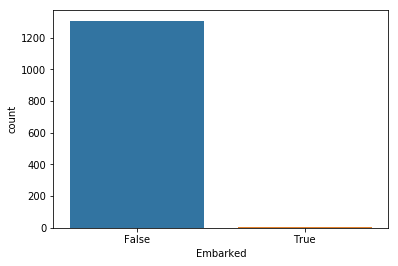

In [84]:
#看Embarked遺漏值
sns.countplot(data['Embarked'].isnull())

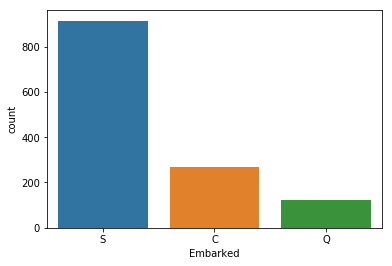

In [85]:
sns.countplot(data['Embarked'])

In [86]:
#最多在S港上傳，填補遺漏值
data['Embarked']=data['Embarked'].fillna('S')

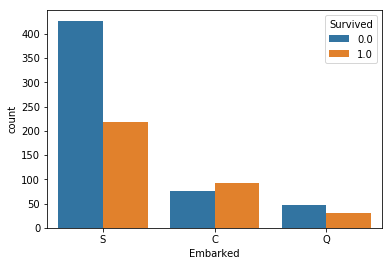

In [87]:
sns.countplot(data['Embarked'],hue=data['Survived'])

In [88]:
data['Fare'].isnull().sum()

1

In [89]:
#用平均填補遺漏值
data['Fare']=data['Fare'].fillna(data['Fare'].mean())

In [90]:
data['Age'].isnull().sum()

263

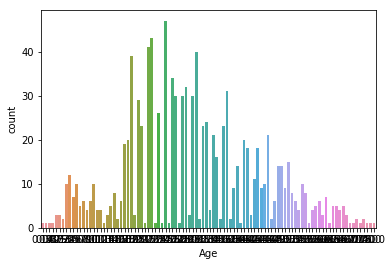

In [91]:
sns.countplot(data['Age'])

In [92]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [93]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes

In [94]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

In [95]:
dataTrain.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family_Size', 'Title1',
       'Title2'],
      dtype='object')

In [96]:
dataTrain=dataTrain[['Survived','Age','Embarked','Fare','Pclass','Sex','Family_Size','Title2']]
dataTest=dataTest[['Age','Embarked','Fare','Pclass','Sex','Family_Size','Title2']]

In [97]:
dataTrain

,Survived,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2
0,0.0,22.0,2,7.2500,2,1,1,2
1,1.0,38.0,0,71.2833,0,0,1,3
2,1.0,26.0,2,7.9250,2,0,0,2
3,1.0,35.0,2,53.1000,0,0,1,2
4,0.0,35.0,2,8.0500,2,1,0,3
5,0.0,28.0,1,8.4583,2,1,0,2
6,0.0,54.0,2,51.8625,0,1,0,1
7,0.0,2.0,2,21.0750,2,1,4,2
8,1.0,27.0,2,11.1333,2,0,2,3
9,1.0,14.0,0,30.0708,1,0,1,2


In [98]:
dataTest

,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2
0,34.5,1,7.8292,2,1,0,2
1,47.0,2,7.0000,2,0,1,3
2,62.0,1,9.6875,1,1,0,2
3,27.0,2,8.6625,2,1,0,2
4,22.0,2,12.2875,2,0,2,3
5,14.0,2,9.2250,2,1,0,2
6,30.0,1,7.6292,2,0,0,1
7,26.0,2,29.0000,1,1,2,2
8,18.0,0,7.2292,2,0,0,3
9,21.0,2,24.1500,2,1,2,2


In [99]:
from sklearn import cross_validation
seed = 0
test_size = 0.3
X = dataTrain.loc[:,['Age','Embarked','Fare','Pclass','Sex','Family_Size','Title2']]
y = dataTrain[['Survived']]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=test_size, random_state=seed)

In [115]:
#max_depth的default=None，這樣建樹時，會使每一個節點只有一個類別，或是達到min_samples_split。
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
clf = clf.fit(X_train,y_train)

In [116]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y,y_pred),"\n")
        
measure_performance(X_train,y_train,clf, show_classification_report=True, show_confusion_matrix=True)


Accuracy:0.989 

Classification report
             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       381
        1.0       1.00      0.98      0.99       242

avg / total       0.99      0.99      0.99       623
 

Confusion matrix
[[380   1]
 [  6 236]] 



In [117]:
#決策樹視覺化2
from sklearn.tree import export_graphviz
import graphviz

a = export_graphviz(clf_dt, out_file='titantic.dot', feature_names=['Age','Embarked','Fare','Pclass','Sex','Family_Size','Title2'])
graph = graphviz.Source(a)  # doctest: +SKIP
graph

import graphviz # doctest: +SKIP
dot_data = export_graphviz(clf_dt, out_file=None,feature_names=['Age','Embarked','Fare','Pclass','Sex','Family_Size','Title2']) # doctest: +SKIP
graph = graphviz.Source(dot_data) # doctest: +SKIP
graph.render("titantic_first") # doctest: +SKIP

'titantic_first.pdf'

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier, param_grid = parameter_grid,
                          cv = cross_validation)

grid_search.fit(all_inputs, all_classes)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

NameError: name 'all_inputs' is not defined

In [120]:
from sklearn import cross_validation
seed = 0
test_size = 0.3
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=test_size, random_state=seed)
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
clf = clf.fit(X_train,y_train)
depth=[]
score=[]
mix=[]
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X_train,y_train)
    depth.append(i)
    score.append(clf.score(X_test,y_test))
    mix.append((i,clf.score(X_test,y_test)))
print(mix)

[(3, 0.8208955223880597), (4, 0.8208955223880597), (5, 0.8134328358208955), (6, 0.7985074626865671), (7, 0.7835820895522388), (8, 0.7985074626865671), (9, 0.7873134328358209), (10, 0.753731343283582), (11, 0.7835820895522388), (12, 0.753731343283582), (13, 0.746268656716418), (14, 0.7425373134328358), (15, 0.753731343283582), (16, 0.746268656716418), (17, 0.75), (18, 0.746268656716418), (19, 0.75)]


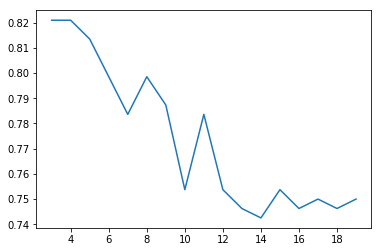

In [121]:
plt.plot(depth,score)
plt.show()

In [122]:
from sklearn import cross_validation
seed = 0
test_size = 0.3
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=test_size, random_state=seed)
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
clf = clf.fit(X_train,y_train)
leaf=[]
score=[]
mix=[]
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(min_samples_leaf=i)
    clf = clf.fit(X_train,y_train)
    leaf.append(i)
    score.append(clf.score(X_test,y_test))
    mix.append((i,clf.score(X_test,y_test)))
print(mix)

[(3, 0.7873134328358209), (4, 0.7985074626865671), (5, 0.7835820895522388), (6, 0.7798507462686567), (7, 0.7873134328358209), (8, 0.8022388059701493), (9, 0.8022388059701493), (10, 0.8059701492537313), (11, 0.7947761194029851), (12, 0.8022388059701493), (13, 0.7985074626865671), (14, 0.7985074626865671), (15, 0.8022388059701493), (16, 0.8022388059701493), (17, 0.8022388059701493), (18, 0.8022388059701493), (19, 0.8022388059701493)]


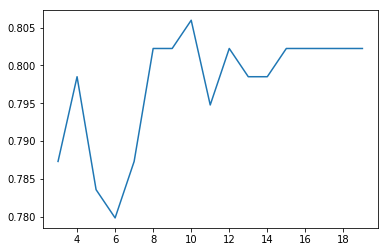

In [123]:
plt.plot(leaf,score)
plt.show()

In [124]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_leaf=5)
clf = clf.fit(X_train,y_train)

In [125]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y,y_pred),"\n")
        
measure_performance(X_train,y_train,clf, show_classification_report=True, show_confusion_matrix=True)
#精準度(precision)= 正確預測的個數(TP)/被預測正確的個數(TP+FP)  正確預測為真佔全部預測為真的比例
#召回率(recall)=正確預測的個數(TP)/預測個數(TP+FN)            正確預測為真佔全部實際為真的比例

Accuracy:0.852 

Classification report
             precision    recall  f1-score   support

        0.0       0.84      0.93      0.89       381
        1.0       0.87      0.73      0.79       242

avg / total       0.85      0.85      0.85       623
 

Confusion matrix
[[355  26]
 [ 66 176]] 



In [126]:
#Training的Test data
clf_dt=tree.DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_leaf=5)
clf_dt.fit(X_train,y_train)
measure_performance(X_test,y_test,clf_dt)

Accuracy:0.813 

Classification report
             precision    recall  f1-score   support

        0.0       0.82      0.89      0.86       168
        1.0       0.79      0.68      0.73       100

avg / total       0.81      0.81      0.81       268
 

Confusion matrix
[[150  18]
 [ 32  68]] 



In [110]:
#predict Test data
#submit the data to kaggle
clf_dt_res =clf_dt.predict(dataTest)
submit['Survived'] = clf_dt_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit_kaggle.csv', index= False)

In [111]:
clf_dt_res =clf_dt.predict(dataTest)
submit['Survived'] = clf_dt_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit_to_kaggle.csv', index= False)

In [112]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,1
6,898,1
7,899,0
8,900,1
9,901,0


In [113]:
#決策樹視覺化2
from sklearn.tree import export_graphviz
import graphviz

a = export_graphviz(clf_dt, out_file='titantic.dot', feature_names=['Age','Embarked','Fare','Pclass','Sex','Family_Size','Title2'])
graph = graphviz.Source(a)  # doctest: +SKIP
graph

import graphviz # doctest: +SKIP
dot_data = export_graphviz(clf_dt, out_file=None,feature_names=['Age','Embarked','Fare','Pclass','Sex','Family_Size','Title2']) # doctest: +SKIP
graph = graphviz.Source(dot_data) # doctest: +SKIP
graph.render("titantic_final") # doctest: +SKIP

'titantic_final.pdf'